<a href="https://colab.research.google.com/github/kush1912/Bug-Report-Classification-Lucene-Java/blob/master/Bug_Classification_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Bug Classification-Lucene Core

In [0]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Datasets/Bug Report classification"

'ASF JIRA 2019-09-29T11_27_41+0000.csv'


In [0]:
data = pd.read_csv("/content/drive/My Drive/Datasets/Bug Report classification/ASF JIRA 2019-09-29T11_27_41+0000.csv")

In [0]:
data.head()

,Summary,Issue key,Issue id,Parent id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,Project url,Priority,Resolution,Assignee,Reporter,Creator,Created,Updated,Last Viewed,Resolved,Affects Version/s,Affects Version/s.1,Affects Version/s.2,Affects Version/s.3,Affects Version/s.4,Affects Version/s.5,Fix Version/s,Fix Version/s.1,Fix Version/s.2,Fix Version/s.3,Fix Version/s.4,Fix Version/s.5,Fix Version/s.6,Fix Version/s.7,Fix Version/s.8,Fix Version/s.9,Component/s,Component/s.1,Component/s.2,...,Comment.169,Comment.170,Comment.171,Comment.172,Comment.173,Comment.174,Comment.175,Comment.176,Comment.177,Comment.178,Comment.179,Comment.180,Comment.181,Comment.182,Comment.183,Comment.184,Comment.185,Comment.186,Comment.187,Comment.188,Comment.189,Comment.190,Comment.191,Comment.192,Comment.193,Comment.194,Comment.195,Comment.196,Comment.197,Comment.198,Comment.199,Comment.200,Comment.201,Comment.202,Comment.203,Comment.204,Comment.205,Comment.206,Comment.207,Comment.208
0,TestRamUsageEstimator.testMap failures,LUCENE-8898,13242651,NaN,Bug,Closed,LUCENE,Lucene - Core,software,ehatcher,"Java Lucene is a high-performance, full-featur...",http://lucene.apache.org/core/,Blocker,Fixed,ab,jpountz,jpountz,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,NaN,NaN,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provide backward compatibility for loading ana...,LUCENE-8907,13244057,NaN,Task,Closed,LUCENE,Lucene - Core,software,ehatcher,"Java Lucene is a high-performance, full-featur...",http://lucene.apache.org/core/,Blocker,Fixed,tomoko,tomoko,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,NaN,NaN,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,modules/analysis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Change all download URLs in build files to HTTPS,LUCENE-8807,13234613,NaN,Task,Closed,LUCENE,Lucene - Core,software,ehatcher,"Java Lucene is a high-performance, full-featur...",http://lucene.apache.org/core/,Blocker,Fixed,uschindler,uschindler,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,8.1,NaN,NaN,NaN,NaN,NaN,7.7.2,8.1.1,8.2,master (9.0),NaN,NaN,NaN,NaN,NaN,NaN,general/build,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CommonGramsQueryFilter in the query analyzer c...,LUCENE-7698,13043903,NaN,Bug,Resolved,LUCENE,Lucene - Core,software,ehatcher,"Java Lucene is a high-performance, full-featur...",http://lucene.apache.org/core/,Blocker,Fixed,NaN,emaijala,emaijala,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,6.4,6.4.1,NaN,NaN,NaN,NaN,6.4.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,core/queryparser,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Highlighter depends on analyzers-common,LUCENE-6572,12838134,NaN,Bug,Closed,LUCENE,Lucene - Core,software,ehatcher,"Java Lucene is a high-performance, full-featur...",http://lucene.apache.org/core/,Blocker,Fixed,simonw,rcmuir,rcmuir,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,modules/highlighter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cols_of_interest=["Issue key","Issue id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last Viewed","Resolved","Issue Type"]
dataset=data[cols_of_interest]
print(dataset.shape)
dataset.head()

(1000, 13)


,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,LUCENE-8898,13242651,TestRamUsageEstimator.testMap failures,Closed,Here is an example failure:\r\n\r\n{noformat}\...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,Bug
1,LUCENE-8907,13244057,Provide backward compatibility for loading ana...,Closed,The changes in LUCENE-8778 have breaking chang...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,Task
2,LUCENE-8807,13234613,Change all download URLs in build files to HTTPS,Closed,At least for Lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,Task
3,LUCENE-7698,13043903,CommonGramsQueryFilter in the query analyzer c...,Resolved,(Please pardon me if the project or component ...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,Bug
4,LUCENE-6572,12838134,Highlighter depends on analyzers-common,Closed,"This is a huge WTF, just for ""LimitTokenOffset...",Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,Bug


In [0]:
# Removing contents of tags and all for further text processing
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')

# Removing links from all for further text processing
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')

# Replace email addresses
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')

# Replace URLs with 'web-address'
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')

# Replace 10 digit phone numbers
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')

# Replace numbers with 'numbr'
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')

# Remove punctuation
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')

#converting to lower case
dataset['Description'] = dataset['Description'].str.lower()
dataset['Summary'] = dataset['Summary'].str.lower()

# Removing non-english content
# dataset.drop(dataset[dataset.language!="english"].index,inplace=True)

# Removing rows with empty columns 
dataset.dropna(subset=['Description','Summary'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/li

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 13 columns):
Issue key      990 non-null object
Issue id       990 non-null int64
Summary        990 non-null object
Status         990 non-null object
Description    990 non-null object
Priority       990 non-null object
Resolution     990 non-null object
Assignee       631 non-null object
Created        990 non-null object
Updated        990 non-null object
Last Viewed    990 non-null object
Resolved       990 non-null object
Issue Type     990 non-null int64
dtypes: int64(2), object(11)
memory usage: 108.3+ KB


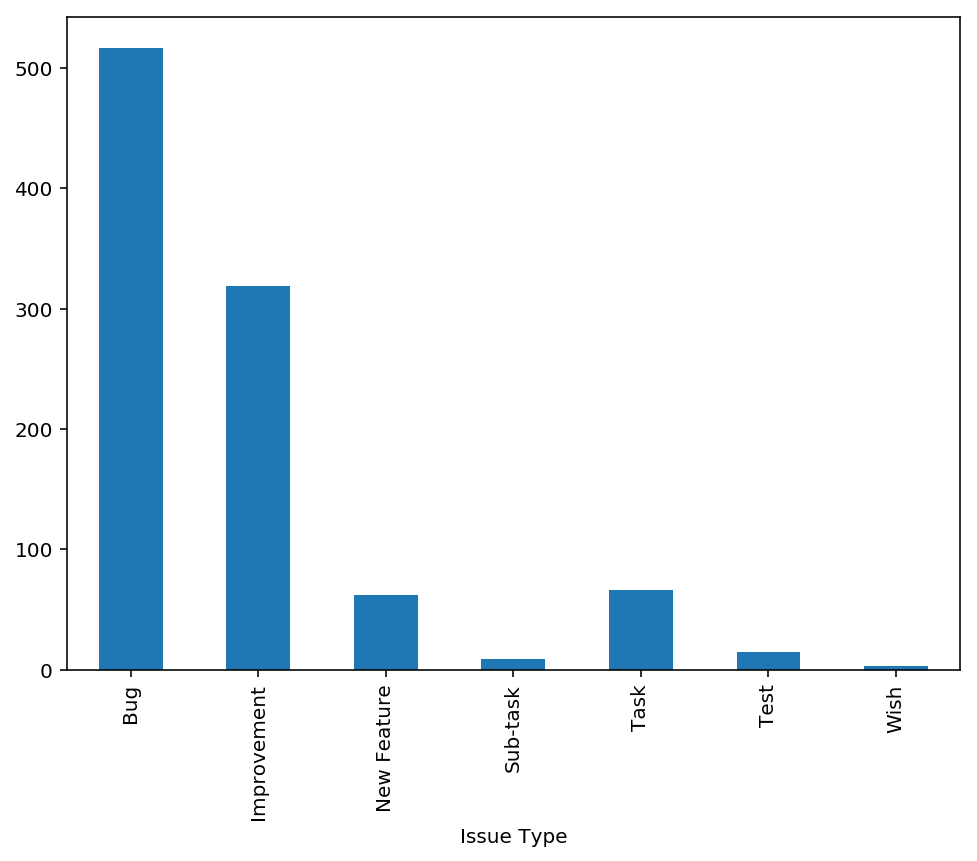

In [0]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('Issue Type').Status.count().plot.bar(ylim=0)
plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset["Issue Type"] = label.fit_transform(dataset["Issue Type"])
dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,0
1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,4
2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,4
3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,0
4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,0


In [0]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tfidf.fit(dataset.Summary)
transformed_summary = vectorizer.transform(dataset.Summary)
#transformed_title = vectorizer.transform(dataset.Description)

In [0]:
feature_names = tfidf.get_feature_names()

In [0]:
#Returns dictionary with term names and total tfidf scores for all terms in corpus
def get_tfidf_term_scores(feature_names):
    term_corpus_dict = {} 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_summary.T[term_ind].toarray())
        
    return term_corpus_dict

In [0]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [0]:
#Returns sort words from highest score to lowest score
def get_sorted_tfidf_scores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [0]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [0]:
def plot_tfidf_scores(scores,termNames, n_words = 18):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (15, 20))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   
    n_words = 75
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top tfidf score words".format(n_words));
    plt.xlabel("TFIDF Score")

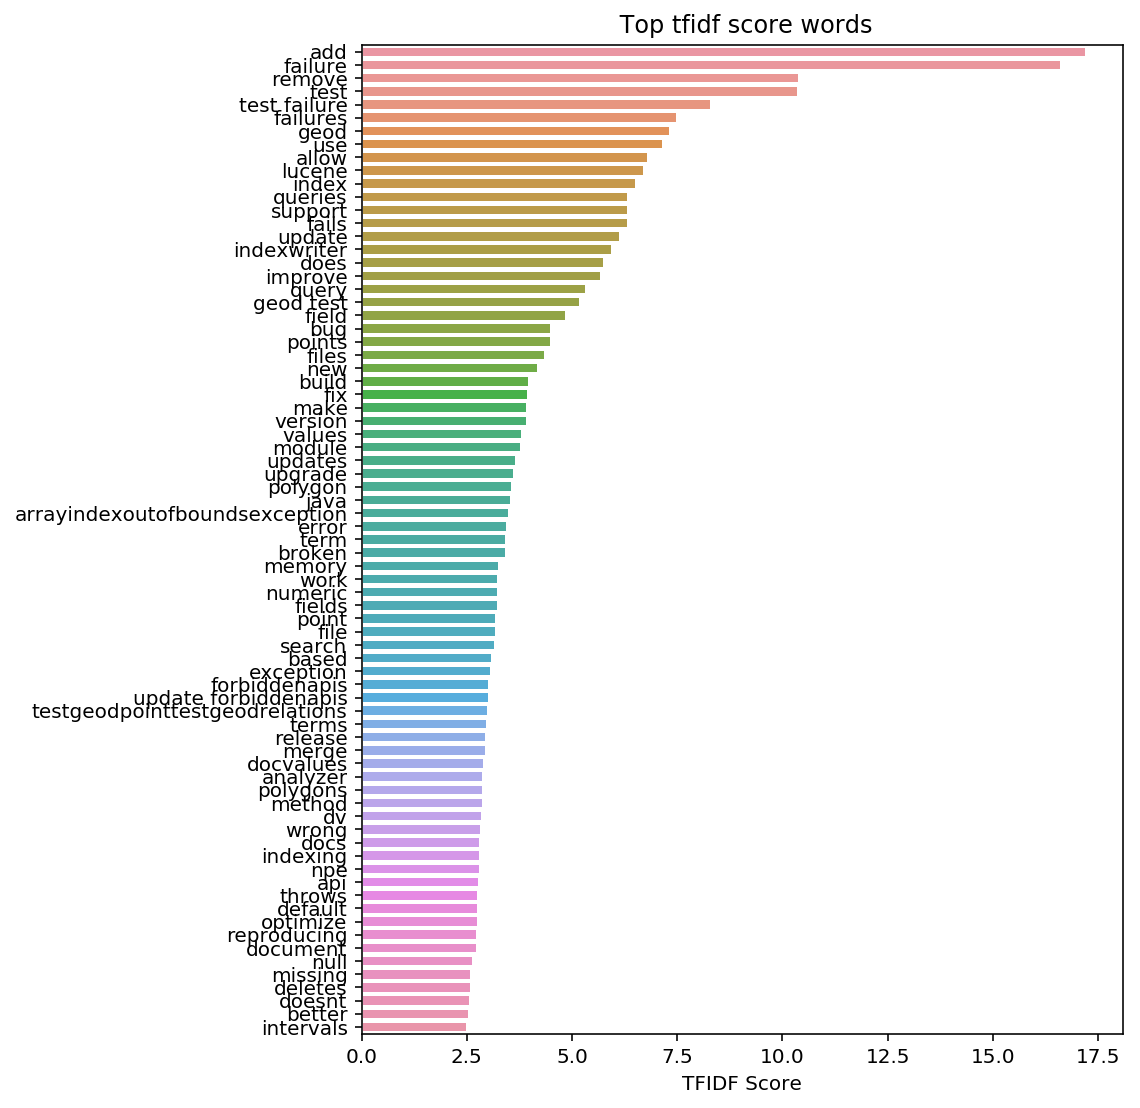

In [0]:
plot_tfidf_scores(scores, termNames, n_words = 5)